# 02 – Era Analysis

Explore pace, efficiency, and shooting trends across seasons.

## Setup

Ensures the project root is on `sys.path` when running from the notebooks directory.

In [1]:
from pathlib import Path

import sys

PROJECT_ROOT = Path.cwd().resolve()
if PROJECT_ROOT.name == 'notebooks':
    PROJECT_ROOT = PROJECT_ROOT.parent
if str(PROJECT_ROOT) not in sys.path:
    sys.path.insert(0, str(PROJECT_ROOT))

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from src.pipeline import generate_team_season_summary


In [2]:
from src.data_ingest import NBADataIngestor

output_path = PROJECT_ROOT / 'data' / 'processed' / 'team_season_regular.csv'
output_path.parent.mkdir(parents=True, exist_ok=True)

ingestor = NBADataIngestor(prefer_sqlite=False)
if output_path.exists():
    summary_rs = pd.read_csv(output_path)
else:
    summary_rs = generate_team_season_summary(
        ingestor,
        regular_season_only=True,
        save=True
    )
summary_rs.head()


,TEAM_ID,SEASON_YEAR,IS_PLAYOFFS,PACE,OFF_EFF_PER_100,DEF_EFF_PER_100,THREE_POINT_RATE,AST_TOV_RATIO,TOTAL_EST_POSSESSIONS,WIN_PCT,GAMES_PLAYED,ERA_KEY,ERA_LABEL,ERA_START_YEAR,ERA_END_YEAR
0,12304,2006,False,75.898936,137.024318,130.436611,0.303797,NaN,75.898936,1.0,1,pace_and_space_rise,Pace-and-Space Rise,2005,2013.0
1,12321,2012,False,88.874291,109.142925,102.391816,0.269231,1.0000,88.874291,1.0,1,pace_and_space_rise,Pace-and-Space Rise,2005,2013.0
2,12321,2013,False,85.440470,95.973255,111.188527,0.411765,0.8125,85.440470,0.0,1,pace_and_space_rise,Pace-and-Space Rise,2005,2013.0
3,1610610024,1947,False,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1,pre_shot_clock,Early BAA/NBL,1946,1953.0
4,1610610029,1948,False,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1,pre_shot_clock,Early BAA/NBL,1946,1953.0


## Pace Trend

Plot the mean pace by season using Matplotlib/Seaborn.

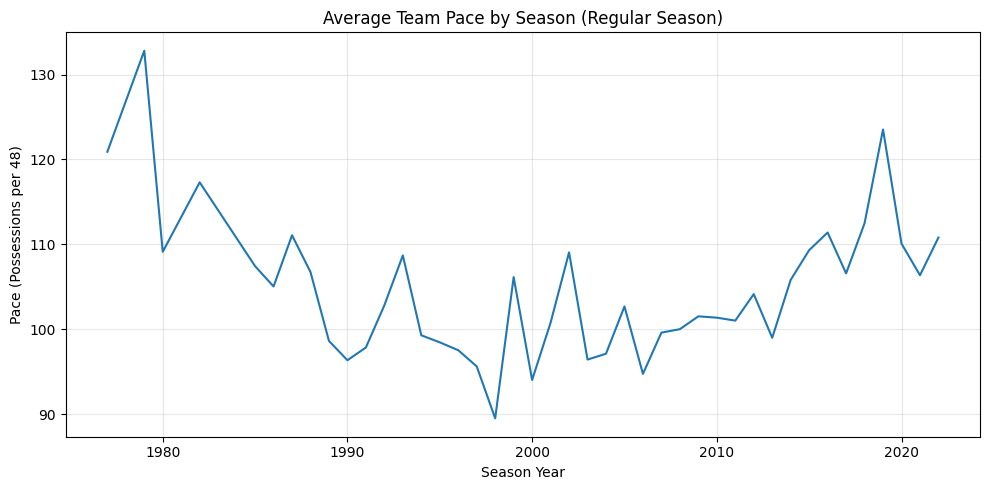

In [3]:
pace_trend = summary_rs.groupby('SEASON_YEAR')['PACE'].mean().reset_index()
plt.figure(figsize=(10, 5))
sns.lineplot(data=pace_trend, x='SEASON_YEAR', y='PACE')
plt.title('Average Team Pace by Season (Regular Season)')
plt.xlabel('Season Year')
plt.ylabel('Pace (Possessions per 48)')
plt.grid(True, alpha=0.3)
plt.tight_layout()

## Three-Point Rate Trend

Visualize how shot profile has shifted over time.

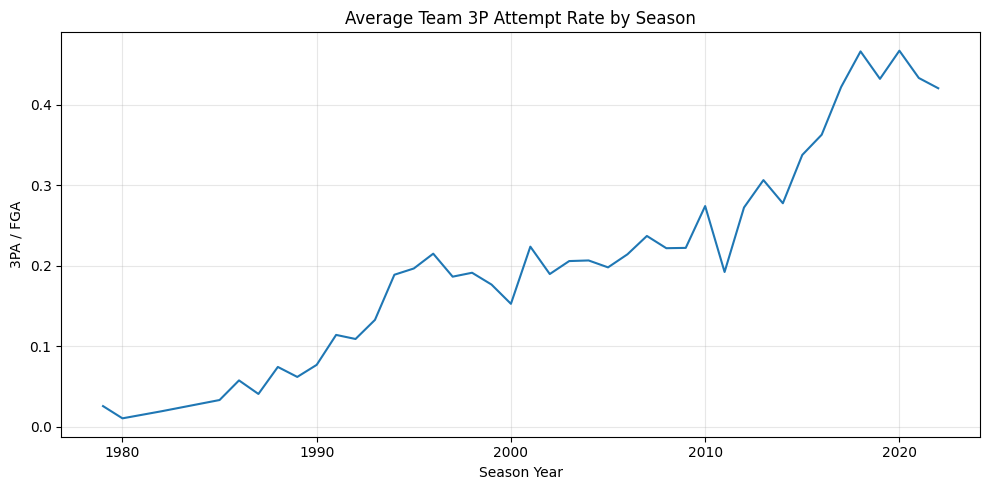

In [4]:
three_point_trend = summary_rs.groupby('SEASON_YEAR')['THREE_POINT_RATE'].mean().reset_index()
plt.figure(figsize=(10, 5))
sns.lineplot(data=three_point_trend, x='SEASON_YEAR', y='THREE_POINT_RATE')
plt.title('Average Team 3P Attempt Rate by Season')
plt.xlabel('Season Year')
plt.ylabel('3PA / FGA')
plt.grid(True, alpha=0.3)
plt.tight_layout()

## Offensive vs Defensive Efficiency

Scatter plot to inspect correlation and potential era clusters.

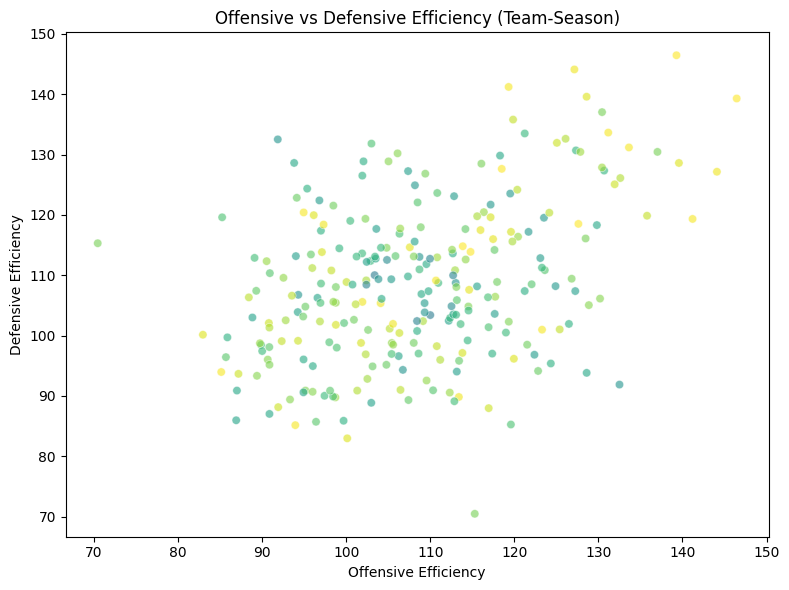

In [5]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=summary_rs, x='OFF_EFF_PER_100', y='DEF_EFF_PER_100', hue='SEASON_YEAR', palette='viridis', legend=False, alpha=0.6)
plt.title('Offensive vs Defensive Efficiency (Team-Season)')
plt.xlabel('Offensive Efficiency')
plt.ylabel('Defensive Efficiency')
plt.tight_layout()

## Next Ideas

- Segment into pre/post rule-change eras and compare distributions.
- Fit change-point detection on pace or 3P rate.
- Add playoff aggregates for comparison.